#Preamble and Imports

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import random
import re
from sklearn.preprocessing import OneHotEncoder
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.model_selection import cross_validate, GridSearchCV

import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from statsmodels.api import add_constant
import itertools
from IPython.display import Image
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
drive.mount("/content/drive")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
!pip install scikit-optimize
!pip install catboost

# For LightGBM and Catboost
from skopt import BayesSearchCV
from catboost import CatBoostRegressor

     |████████████████████████████████| 100 kB 2.8 MB/s 
     |████████████████████████████████| 76.1 MB 55 kB/s 


In [ ]:
# !pip install lightgbm

#Lets do somethings to get it working on GPU
! git clone --recursive https://github.com/Microsoft/LightGBM
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;
!cd ..

Cloning into 'LightGBM'...
remote: Enumerating objects: 25225, done.
remote: Counting objects: 100% (896/896), done.
remote: Compressing objects: 100% (486/486), done.
remote: Total 25225 (delta 574), reused 630 (delta 401), pack-reused 24329
Receiving objects: 100% (25225/25225), 18.78 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (18525/18525), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Co

#Diamonds dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ECE219/Project4/diamonds.csv')
samples,features = df.shape
print('samples,features', samples,features)


samples,features 53940 11


In [ ]:
colnums=[]
for col in df:
    arr = (df[col].unique())
    if isinstance(arr[0], str):
      print(arr) 
      colnums.append(col)
    else:
       print("skipping")
       continue
   

skipping
skipping
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
skipping
skipping
skipping
skipping
skipping
skipping


In [ ]:
# Define numbers denoting each unique string in the data
print(colnums)

dict_cut = {'Fair': 0, 'Good':1, 'Very Good': 2, 'Premium':3, 'Ideal':4}

#enc = OneHotEncoder(handle_unknown='ignore')

dict_color = {'J':0,  'I':1,  'H':2,  'G':3, 'F':4, 'E':5, 'D':6}
dict_clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4,  'VVS2':5, 'VVS1':6,  'IF':7}


['cut', 'color', 'clarity']


In [ ]:
## CHECK WHICH ONES MAY NEED ONE-HOT Encoding

df1 = df.replace({'cut':dict_cut})
df1 = df1.replace({'color':dict_color})
df1 = df1.replace({'clarity':dict_clarity})

In [ ]:
print(df1)

       Unnamed: 0  carat  cut  color  clarity  depth  table  price     x  \
0               1   0.23    4      5        1   61.5   55.0    330  3.95   
1               2   0.21    3      5        2   59.8   61.0    327  3.89   
2               3   0.23    1      5        4   56.9   65.0    328  4.05   
3               4   0.29    3      1        3   62.4   58.0    337  4.20   
4               5   0.31    1      0        1   63.3   58.0    338  4.34   
...           ...    ...  ...    ...      ...    ...    ...    ...   ...   
53935       53936   0.72    4      6        2   60.8   57.0   2758  5.75   
53936       53937   0.72    1      6        2   63.1   55.0   2759  5.69   
53937       53938   0.70    2      6        2   62.8   60.0   2760  5.66   
53938       53939   0.86    3      2        1   61.0   58.0   2757  6.15   
53939       53940   0.75    4      6        1   62.2   55.0   2761  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      

In [ ]:
# #print(df1)
df1 = df1.drop(["Unnamed: 0"],axis=1)
print(df1)


       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    4      5        1   61.5   55.0    330  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0    327  3.89  3.84  2.31
2       0.23    1      5        4   56.9   65.0    328  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0    337  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0    338  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    4      6        2   60.8   57.0   2758  5.75  5.76  3.50
53936   0.72    1      6        2   63.1   55.0   2759  5.69  5.75  3.61
53937   0.70    2      6        2   62.8   60.0   2760  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    4      6        1   62.2   55.0   2761  5.83  5.87  3.64

[53940 rows x 10 columns]


In [ ]:
cols = list(df1)
a, b = cols.index('z'), cols.index('price')
cols[b], cols[a] = cols[a], cols[b]
df1 = df1[cols]
# a, b = cols.index('y'), cols.index('price')
# cols[b], cols[a] = cols[a], cols[b]
# df1 = df1[cols]
# a, b = cols.index('z'), cols.index('price')
# cols[b], cols[a] = cols[a], cols[b]
# df1 = df1[cols]
print(df1.shape)
print(df1)

(53940, 10)
       carat  cut  color  clarity  depth  table     z     x     y  price
0       0.23    4      5        1   61.5   55.0  2.43  3.95  3.98    330
1       0.21    3      5        2   59.8   61.0  2.31  3.89  3.84    327
2       0.23    1      5        4   56.9   65.0  2.31  4.05  4.07    328
3       0.29    3      1        3   62.4   58.0  2.63  4.20  4.23    337
4       0.31    1      0        1   63.3   58.0  2.75  4.34  4.35    338
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...
53935   0.72    4      6        2   60.8   57.0  3.50  5.75  5.76   2758
53936   0.72    1      6        2   63.1   55.0  3.61  5.69  5.75   2759
53937   0.70    2      6        2   62.8   60.0  3.56  5.66  5.68   2760
53938   0.86    3      2        1   61.0   58.0  3.74  6.15  6.12   2757
53939   0.75    4      6        1   62.2   55.0  3.64  5.83  5.87   2761

[53940 rows x 10 columns]


#Standardization

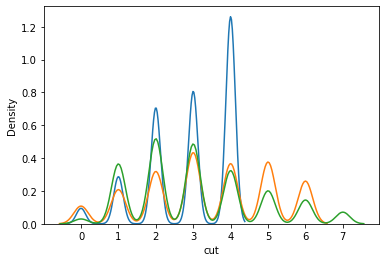

In [ ]:
sb.kdeplot(df1['cut'])
sb.kdeplot(df1['color'])
sb.kdeplot(df1['clarity'])

In [ ]:
# df_min_max_scale=  pd.DataFrame(MinMaxScaler().fit_transform(df1))

# sb.kdeplot(df_min_max_scale[0])
# sb.kdeplot(df_min_max_scale[1])
# sb.kdeplot(df_min_max_scale[2])

In [ ]:
#df_standard_scale=pd.DataFrame(StandardScaler().fit_transform(df1))
scale = StandardScaler()
df_standard_scale = scale.fit_transform(df1)
df_standard_scale = pd.DataFrame(df_standard_scale)
print(df_standard_scale)
# sb.kdeplot(df_standard_scale[0])
# sb.kdeplot(df_standard_scale[1])
# sb.kdeplot(df_standard_scale[2])

              0         1         2         3         4         5         6  \
0     -1.198168  0.981473  0.937163 -1.245215 -0.174092 -1.099672 -1.571129   
1     -1.240361  0.085889  0.937163 -0.638095 -1.360738  1.585529 -1.741175   
2     -1.198168 -1.705279  0.937163  0.576145 -3.385019  3.375663 -1.741175   
3     -1.071587  0.085889 -1.414272 -0.030975  0.454133  0.242928 -1.287720   
4     -1.029394 -1.705279 -2.002131 -1.245215  1.082358  0.242928 -1.117674   
...         ...       ...       ...       ...       ...       ...       ...   
53935 -0.164427  0.981473  1.525021 -0.638095 -0.662711 -0.204605 -0.054888   
53936 -0.164427 -1.705279  1.525021 -0.638095  0.942753 -1.099672  0.100988   
53937 -0.206621 -0.809695  1.525021 -0.638095  0.733344  1.137995  0.030135   
53938  0.130927  0.085889 -0.826413 -1.245215 -0.523105  0.242928  0.285204   
53939 -0.101137  0.981473  1.525021 -1.245215  0.314528 -1.099672  0.143499   

              7         8         9  
0     -1.5878

In [ ]:

print(df_standard_scale)

              0         1         2         3         4         5         6  \
0     -1.198168  0.981473  0.937163 -1.245215 -0.174092 -1.099672 -1.571129   
1     -1.240361  0.085889  0.937163 -0.638095 -1.360738  1.585529 -1.741175   
2     -1.198168 -1.705279  0.937163  0.576145 -3.385019  3.375663 -1.741175   
3     -1.071587  0.085889 -1.414272 -0.030975  0.454133  0.242928 -1.287720   
4     -1.029394 -1.705279 -2.002131 -1.245215  1.082358  0.242928 -1.117674   
...         ...       ...       ...       ...       ...       ...       ...   
53935 -0.164427  0.981473  1.525021 -0.638095 -0.662711 -0.204605 -0.054888   
53936 -0.164427 -1.705279  1.525021 -0.638095  0.942753 -1.099672  0.100988   
53937 -0.206621 -0.809695  1.525021 -0.638095  0.733344  1.137995  0.030135   
53938  0.130927  0.085889 -0.826413 -1.245215 -0.523105  0.242928  0.285204   
53939 -0.101137  0.981473  1.525021 -1.245215  0.314528 -1.099672  0.143499   

              7         8         9  
0     -1.5878

#Data Inspection

Q2

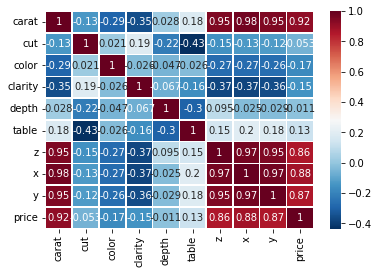

In [ ]:
corr = df1.iloc[:,:-1].corr()
ax = sb.heatmap(corr, linewidths=0.5,cmap="RdBu_r",annot=True)
plt.savefig('/content/drive/My Drive/figures/diamond_heatmap.png',dpi=300,bbox_inches='tight')

Q3

carat


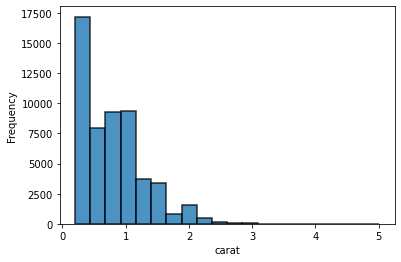

depth


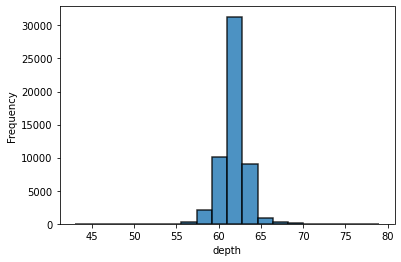

table


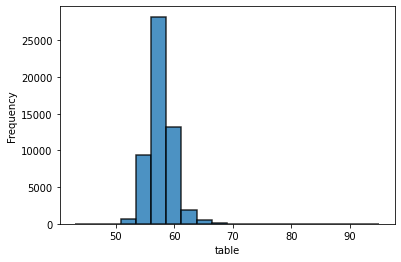

price


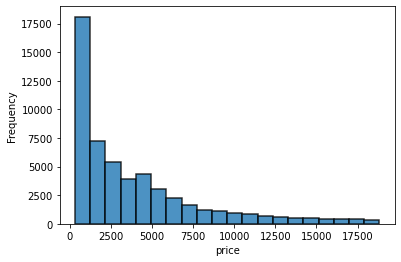

x


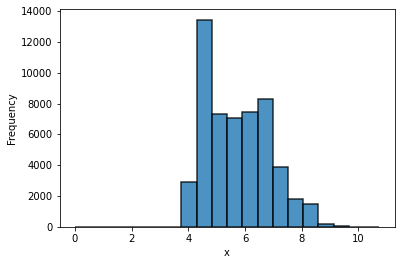

y


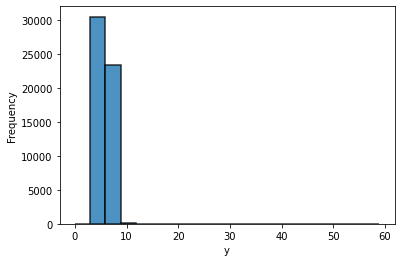

z


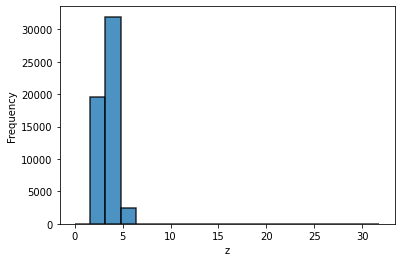

In [ ]:
numerical_features = ['carat','depth', 'table','price', 'x','y','z']
for i in numerical_features:
    print(i)
    plt.figure()
    plt.hist(df1[i],bins=20, edgecolor='k', linewidth=1.5, alpha=0.8)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.savefig(f'/content/drive/My Drive/figures/diamond_{i}.png',dpi=300,bbox_inches='tight')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


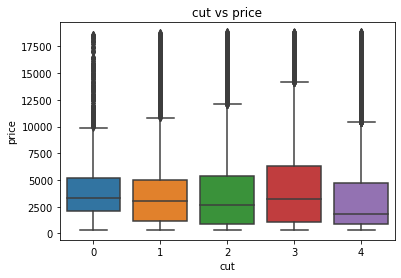

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


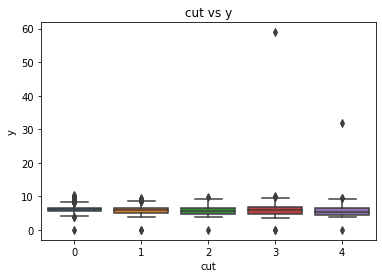

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


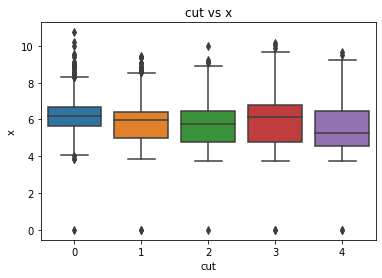

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


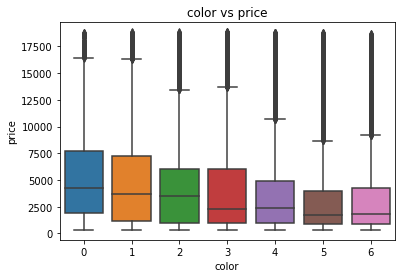

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


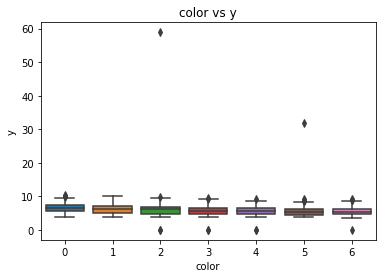

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


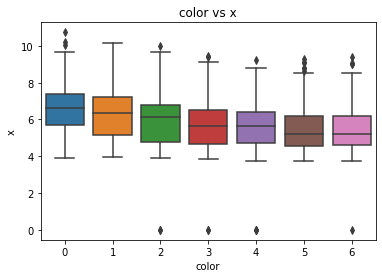

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


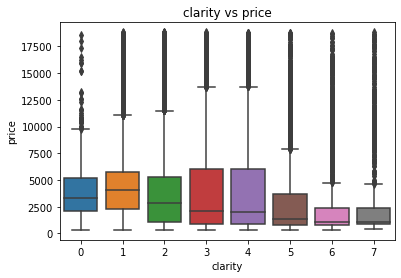

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


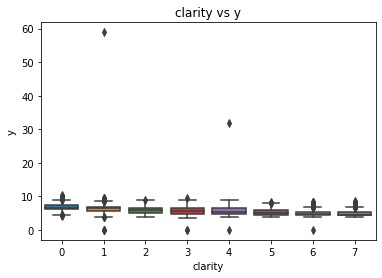

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


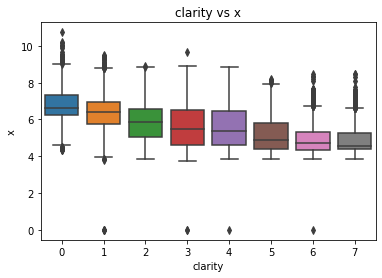

In [ ]:
col_names = list(df1.columns)
categorical_vars = ['cut','color','clarity']
for i in categorical_vars:
    for j in range(1,4):
        plt.figure()
        sb.boxplot(df1[i], df1.iloc[:,-j], order=list(set(df1[i])))
        plt.title(i +' vs '+ col_names[-j])
        plt.savefig(f'/content/drive/My Drive/figures/diamond_categorical{i}.png',dpi=300,bbox_inches='tight')
        plt.show()

cut


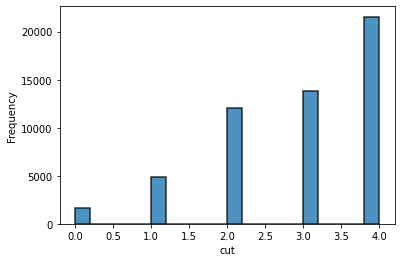

color


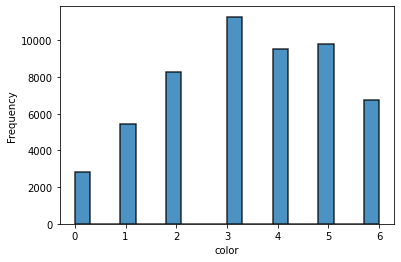

clarity


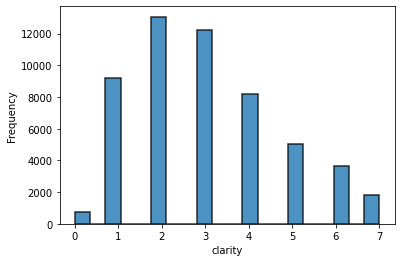

In [ ]:

# Just plotting distrobution of Catergorical variables cut ,color and clarity
categorical_vars=['cut','color','clarity']
i=0;
for cat in categorical_vars:
  plt.figure(i+1)
  i=i+1
  plt.title("Distribution "+cat+' feature in diamond dataset')
  # ticklabels,counts=np.unique(X_df_diamond_unenco[cat],return_counts=True)
  # print(ticklabels)
  n, bins, patches=plt.hist(df1[cat],edgecolor='black',rwidth=0.5,bins=len(np.unique(df1[cat])))
  ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
  plt.xticks(ticks,rotation=90)
  

In [ ]:
# cols = list(df1)
# a, b = cols.index('x'), cols.index('price')
# cols[b], cols[a] = cols[a], cols[b]
# df1 = df1[cols]
# # a, b = cols.index('y'), cols.index('price')
# # cols[b], cols[a] = cols[a], cols[b]
# # df1 = df1[cols]
# # a, b = cols.index('z'), cols.index('price')
# # cols[b], cols[a] = cols[a], cols[b]
# # df1 = df1[cols]
# print(df1.shape)

#Q7

In [ ]:
import sklearn
from sklearn import feature_selection
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression


In [ ]:
x_standard = df_standard_scale.iloc[:,:9]
y_standard = df_standard_scale[9]

MutualInfo = mutual_info_regression(x_standard, y_standard)
Fscore = f_regression(x_standard, y_standard)

In [ ]:
print(MutualInfo)
print(Fscore)

[1.65100383 0.0549679  0.13567749 0.21642188 0.03166471 0.03501469
 1.36148853 1.41352961 1.42207847]
(array([3.04051487e+05, 1.54784468e+02, 1.65440124e+03, 1.18800706e+03,
       6.11586346e+00, 8.86119363e+02, 1.54923267e+05, 1.93741523e+05,
       1.60915662e+05]), array([0.00000000e+000, 1.74601933e-035, 0.00000000e+000, 1.57172076e-257,
       1.34004530e-002, 3.76996315e-193, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000]))


In [ ]:
#10 fold cross validation to be added?
gas_RMSE_MIR = []
gas_RMSE_FR = []

gas_RMSE_MIR_RR = []
gas_RMSE_FR_RR = []


gas_RMSE_MIR_LR = []
gas_RMSE_FR_LR = []



for i in range(1,x_standard.shape[1]):
    print('Testing LR, diamond dataset for k = ', i)
    XgasCur_M = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(x_standard, y_standard)
    XgasCur_F = SelectKBest(score_func=f_regression, k=i).fit_transform(x_standard, y_standard)
    
    gasOut = cross_validate(LinearRegression(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(LinearRegression(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR.append(gasOut['test_neg_root_mean_squared_error'].mean())

    
    
    

Testing LR, diamond dataset for k =  1
Testing LR, diamond dataset for k =  2
Testing LR, diamond dataset for k =  3
Testing LR, diamond dataset for k =  4
Testing LR, diamond dataset for k =  5
Testing LR, diamond dataset for k =  6
Testing LR, diamond dataset for k =  7
Testing LR, diamond dataset for k =  8


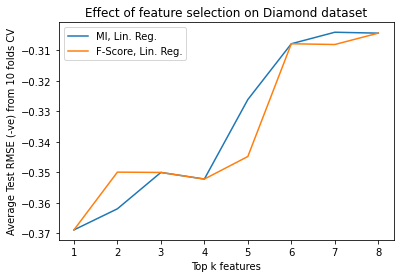

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,len(gas_RMSE_MIR)+1,1),gas_RMSE_MIR)
plt.plot(np.arange(1,len(gas_RMSE_FR)+1,1),gas_RMSE_FR)
plt.legend(['MI, Lin. Reg.','F-Score, Lin. Reg.'],loc='best')
#plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Diamond dataset')
plt.savefig('/content/drive/My Drive/figures/Q7d.png',dpi=300,bbox_inches='tight')
#plt.show()

#Q8-11

In [ ]:
gas_RMSE_MIR = []
gas_RMSE_FR = []

gas_RMSE_MIR_RR = []
gas_RMSE_FR_RR = []


gas_RMSE_MIR_LR = []
gas_RMSE_FR_LR = []



for i in range(1,x_standard.shape[1]):
    print('Testing LR, diamond dataset for k = ', i)
    XgasCur_M = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(x_standard, y_standard)
    XgasCur_F = SelectKBest(score_func=f_regression, k=i).fit_transform(x_standard, y_standard)
    
    gasOut = cross_validate(LinearRegression(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(LinearRegression(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR.append(gasOut['test_neg_root_mean_squared_error'].mean())

    
    print('Testing RR, diamond dataset for k = ', i)
    gasOut = cross_validate(Ridge(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR_RR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(Ridge(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR_RR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing LaR, diamond dataset for k = ', i)
    gasOut = cross_validate(Lasso(), XgasCur_M, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_MIR_LR.append(gasOut['test_neg_root_mean_squared_error'].mean())
    gasOut = cross_validate(Lasso(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10)
    gas_RMSE_FR_LR.append(gasOut['test_neg_root_mean_squared_error'].mean())

Testing LR, diamond dataset for k =  1
Testing RR, diamond dataset for k =  1
Testing LaR, diamond dataset for k =  1
Testing LR, diamond dataset for k =  2
Testing RR, diamond dataset for k =  2
Testing LaR, diamond dataset for k =  2
Testing LR, diamond dataset for k =  3
Testing RR, diamond dataset for k =  3
Testing LaR, diamond dataset for k =  3
Testing LR, diamond dataset for k =  4
Testing RR, diamond dataset for k =  4
Testing LaR, diamond dataset for k =  4
Testing LR, diamond dataset for k =  5
Testing RR, diamond dataset for k =  5
Testing LaR, diamond dataset for k =  5
Testing LR, diamond dataset for k =  6
Testing RR, diamond dataset for k =  6
Testing LaR, diamond dataset for k =  6
Testing LR, diamond dataset for k =  7
Testing RR, diamond dataset for k =  7
Testing LaR, diamond dataset for k =  7
Testing LR, diamond dataset for k =  8
Testing RR, diamond dataset for k =  8
Testing LaR, diamond dataset for k =  8


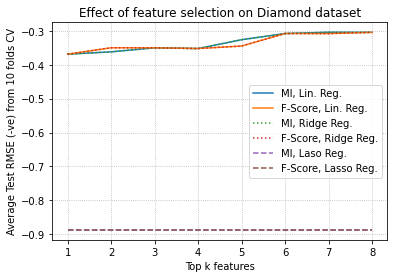

In [ ]:
plt.plot(np.arange(1,len(gas_RMSE_MIR)+1,1),gas_RMSE_MIR)
plt.plot(np.arange(1,len(gas_RMSE_FR)+1,1),gas_RMSE_FR)
plt.plot(np.arange(1,len(gas_RMSE_MIR_RR)+1,1),gas_RMSE_MIR_RR,':')
plt.plot(np.arange(1,len(gas_RMSE_FR_RR)+1,1),gas_RMSE_FR_RR,':')
plt.plot(np.arange(1,len(gas_RMSE_MIR_LR)+1,1),gas_RMSE_MIR_LR,'--')
plt.plot(np.arange(1,len(gas_RMSE_FR_LR)+1,1),gas_RMSE_FR_LR,'--')
plt.legend(['MI, Lin. Reg.','F-Score, Lin. Reg.','MI, Ridge Reg.',
            'F-Score, Ridge Reg.','MI, Laso Reg.','F-Score, Lasso Reg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Diamond dataset')
plt.savefig('/content/drive/My Drive/figures/Q9d_a.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
k_val = 9

x_nostandard = df1.iloc[:,:9]
y_nostandard = df1.iloc[:,9]


XgasCur_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(x_nostandard,y_standard)
XgasCur_MIR = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(x_nostandard, y_standard)
XgasCur_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(x_standard, y_standard)
XgasCur_MIRS = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(x_standard, y_standard)


#Linear Regression

In [ ]:
gasOut = cross_validate(LinearRegression(), XgasCur_F, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, diamond dataset, F1, linear regression: Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())
gasOut = cross_validate(LinearRegression(), XgasCur_MIR, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, diamond dataset, MI, linear regression: Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())
gasOut = cross_validate(LinearRegression(), XgasCur_FS, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, diamond dataset, F1, linear regression:  Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())
gasOut = cross_validate(LinearRegression(), XgasCur_MIRS, y_standard, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, diamond dataset, MI, linear regression: Test=',gasOut['test_neg_root_mean_squared_error'].mean(),',Train=',gasOut['train_neg_root_mean_squared_error'].mean())



• No standardization, diamond dataset, F1, linear regression: Test= -0.3020613218983749 ,Train= -0.3023710286937543
• No standardization, diamond dataset, MI, linear regression: Test= -0.3020613218983749 ,Train= -0.3023710286937543
• Standardization, diamond dataset, F1, linear regression:  Test= -0.3020613218983562 ,Train= -0.3023710286937543
• Standardization, diamond dataset, MI, linear regression: Test= -0.3020613218983562 ,Train= -0.3023710286937543


#Lasso and Ridge regression

In [ ]:
pipe_RR = Pipeline([('model', Ridge(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-3,3)]
}

In [ ]:
print("Testing Diamond..\n")
gridgasRR_F = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10,  verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_F, y_standard)
gridgasRR_FS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10,  verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)
gridgasRR_M = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIR, y_standard)
gridgasRR_MS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10,  verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIRS, y_standard)

Testing Diamond..

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
print('No standardization, diamond dataset, F1, ridge reg., Test RMSE:',gridgasRR_F.best_score_,
      ',alpha:',gridgasRR_F.best_params_,'train RMSE',max(gridgasRR_F.cv_results_['mean_train_score']))
print('Standardization, diamond dataset, F1, ridge reg., Test RMSE:',gridgasRR_FS.best_score_,
      ',alpha:',gridgasRR_FS.best_params_,'train RMSE',max(gridgasRR_FS.cv_results_['mean_train_score']))
print('No standardization, diamond dataset, MI, ridge reg., Test RMSE:',gridgasRR_M.best_score_,
      ',alpha:',gridgasRR_F.best_params_,'train RMSE',max(gridgasRR_M.cv_results_['mean_train_score']))
print('Standardization, diamond dataset, MI, ridge reg., Test RMSE:',gridgasRR_MS.best_score_,
      ',alpha:',gridgasRR_MS.best_params_,'train RMSE',max(gridgasRR_MS.cv_results_['mean_train_score']))


No standardization, diamond dataset, F1, ridge reg., Test RMSE: -0.30206141478673987 ,alpha: {'model__alpha': 0.001} train RMSE -0.3023710286943134
Standardization, diamond dataset, F1, ridge reg., Test RMSE: -0.30206134341728713 ,alpha: {'model__alpha': 0.001} train RMSE -0.3023710286937936
No standardization, diamond dataset, MI, ridge reg., Test RMSE: -0.30206141478673987 ,alpha: {'model__alpha': 0.001} train RMSE -0.3023710286943134
Standardization, diamond dataset, MI, ridge reg., Test RMSE: -0.30206134341728713 ,alpha: {'model__alpha': 0.001} train RMSE -0.3023710286937936


In [ ]:
pipe_LAR = Pipeline([('model', Lasso(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-3,3)]
}

In [ ]:
print("Testing diamond..\n")
gridgasLAR_F = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_F, y_standard)
gridgasLAR_FS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)
gridgasLAR_M = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIR, y_standard)
gridgasLAR_MS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_MIRS, y_standard)


Testing diamond..

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
print('No standardization, diamond dataset, F1, lasso reg., Test RMSE:',gridgasLAR_F.best_score_,
      ',alpha:',gridgasLAR_F.best_params_,'train RMSE',max(gridgasLAR_F.cv_results_['mean_train_score']))
print('Standardization, diamond dataset, F1, lasso reg., Test RMSE:',gridgasLAR_FS.best_score_,
      ',alpha:',gridgasLAR_FS.best_params_,'train RMSE',max(gridgasLAR_FS.cv_results_['mean_train_score']))
print('No standardization, diamond dataset, MI, lasso reg., Test RMSE:',gridgasLAR_M.best_score_,
      ',alpha:',gridgasLAR_F.best_params_,'train RMSE',max(gridgasLAR_F.cv_results_['mean_train_score']))
print('Standardization, diamond dataset, MI, lasso reg., Test RMSE:',gridgasLAR_MS.best_score_,
      ',alpha:',gridgasLAR_MS.best_params_,'train RMSE',max(gridgasLAR_MS.cv_results_['mean_train_score']))

No standardization, diamond dataset, F1, lasso reg., Test RMSE: -0.30494626807031894 ,alpha: {'model__alpha': 0.001} train RMSE -0.30275633006655944
Standardization, diamond dataset, F1, lasso reg., Test RMSE: -0.3037675513851673 ,alpha: {'model__alpha': 0.001} train RMSE -0.3025586872319397
No standardization, diamond dataset, MI, lasso reg., Test RMSE: -0.30494626807031894 ,alpha: {'model__alpha': 0.001} train RMSE -0.30275633006655944
Standardization, diamond dataset, MI, lasso reg., Test RMSE: -0.3037675513851673 ,alpha: {'model__alpha': 0.001} train RMSE -0.3025586872319397


#Q12-14

In [ ]:
degree_list = np.arange(1,6,1)

pipe_PR_gas = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])

param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [10.0**x for x in np.arange(-3,3)]
    
}

In [ ]:
gridgas_PR = GridSearchCV(pipe_PR_gas, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS,y_standard)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(gridgas_PR.best_estimator_)

Pipeline(steps=[('PR', PolynomialFeatures(degree=1)),
                ('model', Ridge(alpha=0.001, random_state=42))])


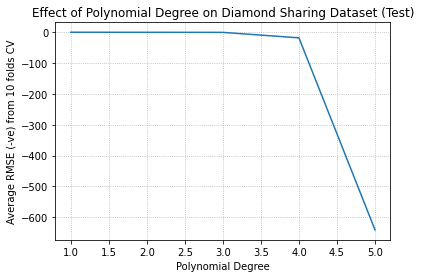

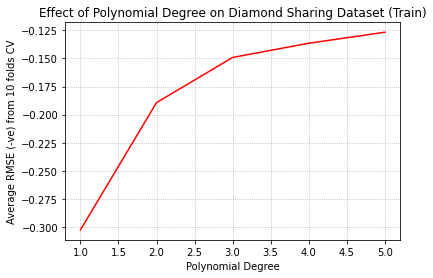

In [ ]:
poly_result = pd.DataFrame(gridgas_PR.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
gas_score = []
gas_train = []
gas_alpha = []
for i in degree_list:
    gas_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    gas_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    gas_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Diamond Sharing Dataset (Test)')
plt.savefig('/content/drive/My Drive/figures/Q15d_a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(degree_list,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Diamond Sharing Dataset (Train)')
plt.savefig('/content/drive/My Drive/figures/Q13d.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
new_feat = (np.prod(df1[['x','y']],axis=1))

df2 = df1
df2['new_feat'] = new_feat
print(df2)


       carat  cut  color  clarity  depth  table     z     x     y  price  \
0       0.23    4      5        1   61.5   55.0  2.43  3.95  3.98    330   
1       0.21    3      5        2   59.8   61.0  2.31  3.89  3.84    327   
2       0.23    1      5        4   56.9   65.0  2.31  4.05  4.07    328   
3       0.29    3      1        3   62.4   58.0  2.63  4.20  4.23    337   
4       0.31    1      0        1   63.3   58.0  2.75  4.34  4.35    338   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...   
53935   0.72    4      6        2   60.8   57.0  3.50  5.75  5.76   2758   
53936   0.72    1      6        2   63.1   55.0  3.61  5.69  5.75   2759   
53937   0.70    2      6        2   62.8   60.0  3.56  5.66  5.68   2760   
53938   0.86    3      2        1   61.0   58.0  3.74  6.15  6.12   2757   
53939   0.75    4      6        1   62.2   55.0  3.64  5.83  5.87   2761   

       new_feat  
0       15.7210  
1       14.9376  
2       16.4835  
3       17.7660

#Q14

In [ ]:
degree_list = np.arange(1,6,1)
transcode_alpha = []
# poly_result = pd.DataFrame(gridTranscode_PR.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
# for i in degree_list:
#     #transcode_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
#     #transcode_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
#     transcode_alpha.append(float(poly_result['param_model__alpha'][
#         (poly_result.loc[poly_result['param_PR__degree'] == i])
#         [['mean_test_score']].idxmax()].to_numpy()))
param_grid_PR = {
  'PR__degree': degree_list,
  'model__alpha': [10.0**x for x in np.arange(-3,3)]
    
}

gridTranscode_PR_test = GridSearchCV(pipe_PR_gas,param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1,scoring='neg_root_mean_squared_error',return_train_score=True).fit(XgasCur_FS,y_standard)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
#print('Average Test RMSE (-ve) without inverse feature (degree = 2):',transcode_score[1])
print('Average Test RMSE (-ve) with inverse feature (degree = 2):',gridTranscode_PR_test.best_score_)

Average Test RMSE (-ve) with inverse feature (degree = 2): -0.30206134341728513


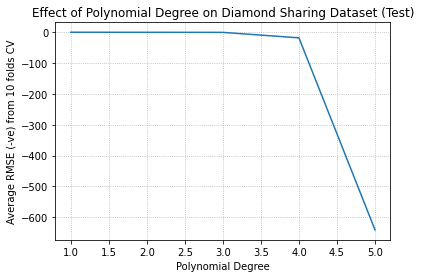

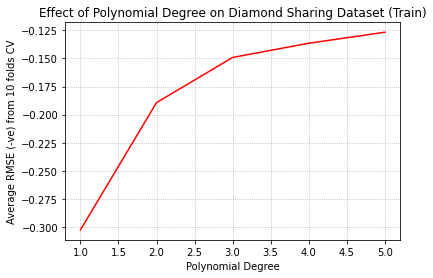

In [ ]:
poly_result = pd.DataFrame(gridTranscode_PR_test.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
gas_score = []
gas_train = []
gas_alpha = []
for i in degree_list:
    gas_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    gas_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    gas_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Diamond Sharing Dataset (Test)')
plt.savefig('/content/drive/My Drive/figures/Q14a_a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(degree_list,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Diamond Sharing Dataset (Train)')
plt.savefig('/content/drive/My Drive/figures/Q14b.png',dpi=300,bbox_inches='tight')
plt.show()

#Most Salient Features

In [ ]:
chY = SelectKBest(score_func=f_regression, k=6)
XTranscode_Test = chY.fit_transform(df1.loc[:, df1.columns != 'price'], df1.iloc[:,9])
column_names = df1.loc[:, df1.columns != 'price'].columns[chY.get_support()]
print(column_names)
b_params = gridgas_PR.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features (diamond):',salient_features)

Index(['carat', 'color', 'clarity', 'z', 'x', 'y'], dtype='object')
Top 5 Salient features (diamond): ['carat', 'clarity', 'x', 'color', 'z']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
chY = SelectKBest(score_func=f_regression, k=9)
XTranscode_Test = chY.fit_transform(df1.loc[:, df1.columns != 'price'], df1.iloc[:,9])
column_names = df1.loc[:, df1.columns != 'price'].columns[chY.get_support()]
print(column_names)
b_params = gridgas_PR.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features (diamond):',salient_features)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'z', 'x', 'y'], dtype='object')
Top 5 Salient features (diamond): ['carat', 'x', 'clarity', 'color', 'cut']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Neural Network

In [ ]:
# a_list = [10,20,30,50]
# all_combinations = []
# for r in range(len(a_list) + 1):
#     combinations_object = itertools.combinations_with_replacement(a_list, r)
#     combinations_list = list(combinations_object)
#     all_combinations += combinations_list
# all_combinations = all_combinations[1:]

pipe_NN = Pipeline([
    ('model', MLPRegressor(random_state=42,max_iter=900))
])

all_combinations = [(50,), (100,), (50,50),(50,100),(100,100)]                    
param_grid_NN = {
    'model__hidden_layer_sizes': all_combinations,
    'model__alpha': [0.0001, 0.05, 0.5],
    'model__activation': ['logistic','tanh', 'relu']  
}

In [ ]:
print(all_combinations)

[(50,), (100,), (50, 50), (50, 100), (100, 100)]


In [ ]:
gridgas_NN = GridSearchCV(pipe_NN, param_grid=param_grid_NN, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [ ]:
poly_result = pd.DataFrame(gridgas_NN.cv_results_)[['mean_test_score','mean_train_score','param_model__alpha','param_model__activation','param_model__hidden_layer_sizes']]
print('Best parameters (diamond):',gridgas_NN.best_params_,',Test RMSE:',gridgas_NN.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (diamond): {'model__activation': 'tanh', 'model__alpha': 0.05, 'model__hidden_layer_sizes': (50, 50)} ,Test RMSE: -0.14204243627543894
Train RMSE: -0.1261090085650992


#Random Forest

In [ ]:
pipe_RF = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True))
])

param_grid_RF = {
    'model__max_features': np.arange(1,11,1),
    'model__n_estimators': [10,50,100,150,200],
    'model__max_depth': np.arange(1, 11, 1)
    
}

In [ ]:
gridgas_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XgasCur_FS, y_standard)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-pa

In [ ]:
poly_result = pd.DataFrame(gridgas_RF.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
print('Best parameters (diamond):',gridgas_RF.best_params_,',Test RMSE:',gridgas_RF.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (diamond): {'model__max_depth': 10, 'model__max_features': 6, 'model__n_estimators': 200} ,Test RMSE: -0.19489330450237063
Train RMSE: -0.11952202091143489


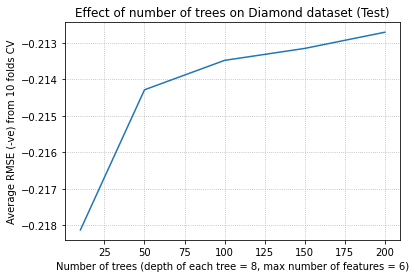

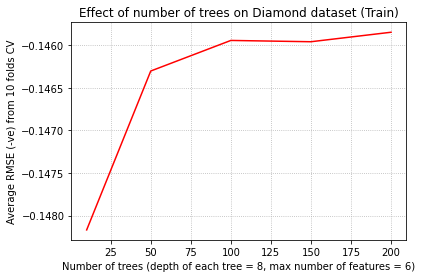

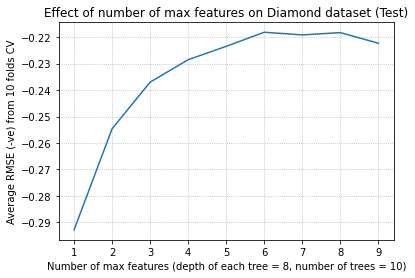

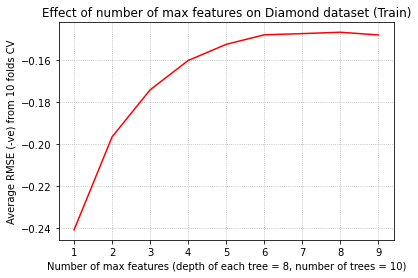

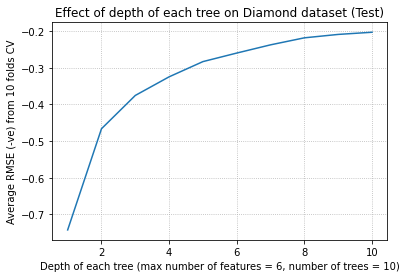

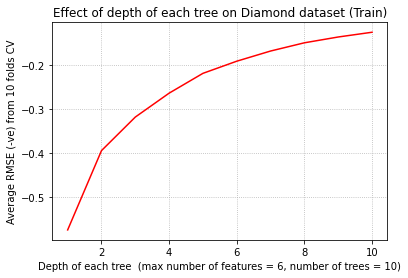

In [ ]:
max_features = np.arange(1,11,1).reshape(10)
n_estimators = [10,50,100,150,200]
max_depth = np.arange(1, 11, 1).reshape(10)

gas_score = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__max_features'] == 6)]).mean_test_score)
gas_train = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__max_features'] == 6)]).mean_train_score)
plt.plot(n_estimators,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 8, max number of features = 6)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Test)')
plt.savefig('/content/drive/My Drive/figures/Q21d_a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(n_estimators,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 8, max number of features = 6)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Train)')
plt.savefig('/content/drive/My Drive/figures/Q21d_b.png',dpi=300,bbox_inches='tight')
plt.show()

gas_score = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__n_estimators'] == 10)]).mean_test_score)
gas_train = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__n_estimators'] == 10)]).mean_train_score)
plt.plot(max_features,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 8, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Test)')
plt.savefig('/content/drive/My Drive/figures/Q21d_c.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_features,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 8, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Train)')
plt.savefig('/content/drive/My Drive/figures/Q21d_d.png',dpi=300,bbox_inches='tight')
plt.show()

gas_score = list((poly_result[(poly_result['param_model__max_features'] == 6) & (poly_result['param_model__n_estimators'] == 10)]).mean_test_score)
gas_train = list((poly_result[(poly_result['param_model__max_features'] == 6) & (poly_result['param_model__n_estimators'] == 10)]).mean_train_score)
plt.plot(max_depth,gas_score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 6, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Test)')
plt.savefig('/content/drive/My Drive/figures/Q21d_e.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_depth,gas_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 6, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Train)')
plt.savefig('/content/drive/My Drive/figures/Q21d_f.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
print('OOB, Diamond:',RandomForestRegressor(random_state=42,max_depth=6,
                                         max_features=2, n_estimators=120, oob_score=True).fit(XgasCur_FS,y_standard).oob_score_)


OOB, Diamond: 0.898


#Lightboost

In [ ]:
# First lets define an optimizer for LIGHT GBM
from LightGBM import *
import lightgbm as lgbm

In [ ]:
# First lets define an optimizer for LIGHT GBM


opti_lgbm = BayesSearchCV(
    lgbm.LGBMRegressor(random_state=42,verbose=1,n_jobs=-1),
    {
        'boosting_type': ['gbdt', 'dart'],
        'max_depth': np.arange(1,100,10),
        'num_leaves': np.arange(10,800,10),
        'n_estimators': np.arange(10,800,100),
        'reg_alpha': [10.0**x for x in np.arange(-4,3)],
        'reg_lambda': [10.0**x for x in np.arange(-4,3)],
        'min_split_gain': [10.0**x for x in np.arange(-4,0)],
    },
    n_iter=45,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True,
)

result = opti_lgbm.fit(XgasCur_FS,y_standard)



print('Best parameters (for Gas emission set LightGBM):',opti_lgbm.best_params_,
      ',Test RMSE:',opti_lgbm.best_score_,'training RMSE:',opti_lgbm.cv_results_)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print('Best parameters (for Gas emission set LightGBM):',opti_lgbm.best_params_,
      ',Test RMSE:',opti_lgbm.best_score_,'training RMSE:',max(opti_lgbm.cv_results_['mean_train_score']))

Best parameters (for Gas emission set LightGBM): OrderedDict([('boosting_type', 'dart'), ('max_depth', 21), ('min_split_gain', 0.0001), ('n_estimators', 710), ('num_leaves', 40), ('reg_alpha', 0.0001), ('reg_lambda', 0.0001)]) ,Test RMSE: -0.28960438320739557 training RMSE: -0.05959178669271388


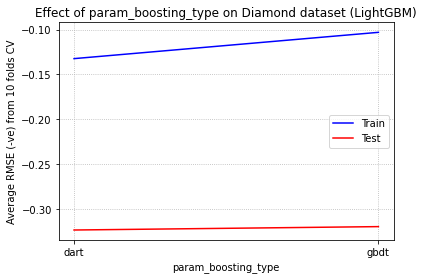

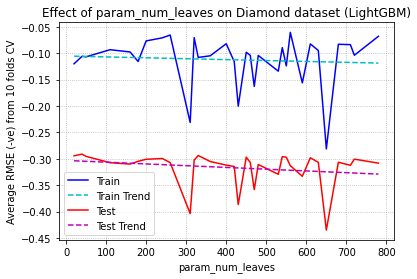

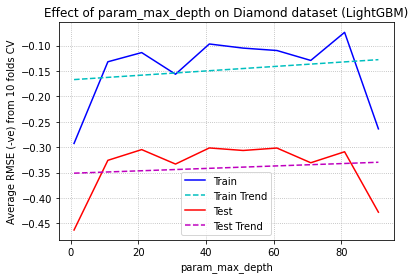

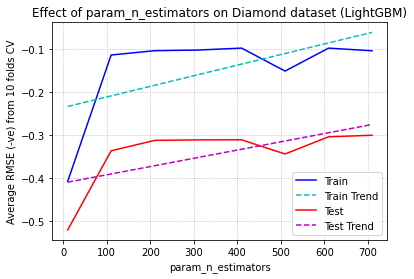

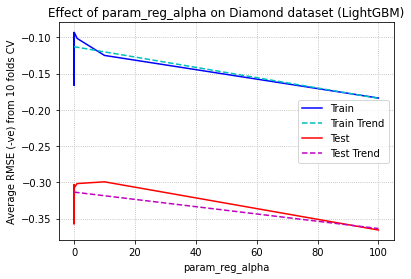

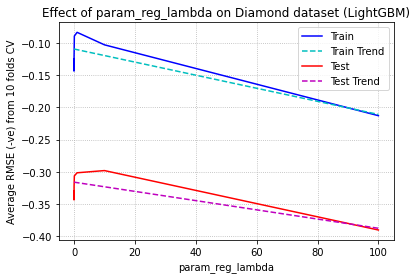

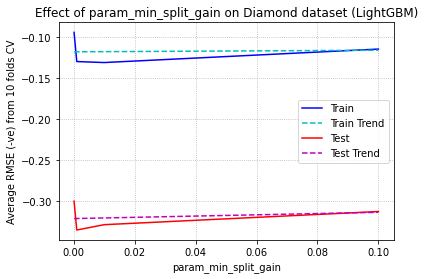

In [ ]:
param_list = ['param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda',
              'param_min_split_gain'] 
for param in param_list:
    param_set = sorted(list(set(opti_lgbm.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_lgbm.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_lgbm.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_lgbm.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_lgbm.cv_results_[param]) 
                                              if x == item]])) 
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Diamond dataset (LightGBM)" % param)
    plt.savefig('/content/drive/My Drive/figures/Q22lightgbm'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

#catboost

In [ ]:
# Code for catboost
    

opti_catboost= BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,600,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,4)],
        'max_depth': np.arange(1,16,2),
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['SymmetricTree'],
        'score_function': ['Cosine','L2']
        
    },
    n_iter=40,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

result = opti_catboost.fit(x_standard, y_standard)


# import pickle

# filename = 'light_catboost_param2.sav'
# pickle.dump(opti_catboost, open('/content/gdrive/MyDrive/DataMining/Project 4/'+filename, 'wb'))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print('Best parameters (for Diamond emission set Catboost):',opti_catboost.best_params_,
      ',Test RMSE:',opti_catboost.best_score_,'training RMSE:',opti_catboost.cv_results_)



Best parameters (for Diamond emission set Catboost): OrderedDict([('bagging_temperature', 2.1), ('colsample_bylevel', 0.4), ('grow_policy', 'SymmetricTree'), ('l2_leaf_reg', 0.1), ('max_depth', 9), ('num_trees', 410), ('score_function', 'Cosine')]) ,Test RMSE: -0.2701028804451324 training RMSE: {'mean_fit_time': array([1.44042107e+01, 2.32346392e+00, 2.78830895e+00, 3.16124725e-01,
       6.16612328e+01, 5.08760504e+01, 1.21324699e+01, 2.09577560e-01,
       2.63715482e+00, 4.55831513e+00, 3.79997971e+01, 1.44230578e+02,
       7.23464837e+00, 3.74102530e+00, 1.38147955e+01, 7.28001313e+00,
       1.11801899e+01, 7.27486901e+00, 4.07691174e+00, 4.71910944e+00,
       2.43185678e+00, 1.18184276e+00, 2.06183146e+02, 4.92907324e+00,
       7.52578077e+00, 3.26935182e+00, 6.38785148e+00, 1.53010736e+00,
       8.59268022e+00, 1.27383320e+01, 2.10333234e+02, 1.81188062e+01,
       3.18701520e+00, 1.77324735e+01, 6.89100266e+00, 1.39749500e+01,
       6.24232392e+00, 6.94845573e+01, 5.751866

In [ ]:
print('Best parameters (for Diamond emission set Catboost):',opti_catboost.best_params_,
      ',Test RMSE:',opti_catboost.best_score_,'training RMSE:',max(opti_catboost.cv_results_['mean_train_score']))



Best parameters (for Diamond emission set Catboost): OrderedDict([('bagging_temperature', 2.1), ('colsample_bylevel', 0.4), ('grow_policy', 'SymmetricTree'), ('l2_leaf_reg', 0.1), ('max_depth', 9), ('num_trees', 410), ('score_function', 'Cosine')]) ,Test RMSE: -0.2701028804451324 training RMSE: -0.08968941262558527


In [ ]:
opti_catboost2= BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,600,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-3,4)],
        'max_depth': np.arange(2,16,2),
        'bagging_temperature': np.arange(0.1,5,1),
        'grow_policy': ['Lossguide'],
        'score_function': ['Cosine','L2']
        
    },
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

result = opti_catboost2.fit(XgasCur_FS,y_standard)


# import pickle
# print('Best parameters (for Gas emission set Catboost):',opti_catboost.best_params_,
#       ',Test RMSE:',opti_catboost.best_score_,'training RMSE:',opti_catboost.cv_results_)
# filename = 'light_catboost_param3.sav'
# pickle.dump(opti_catboost, open('/content/gdrive/MyDrive/DataMining/Project 4/'+filename, 'wb'))



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print('Best parameters (for Diamond emission set Catboost):',opti_catboost2.best_params_,
      ',Test RMSE:',opti_catboost2.best_score_,'training RMSE:',opti_catboost2.cv_results_)



Best parameters (for Diamond emission set Catboost): OrderedDict([('bagging_temperature', 0.1), ('colsample_bylevel', 0.4), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 10.0), ('max_depth', 14), ('num_trees', 510), ('score_function', 'Cosine')]) ,Test RMSE: -0.2860089019503277 training RMSE: {'mean_fit_time': array([11.30316148,  0.77829561,  7.43286171,  0.50015616, 20.89668827,
       13.31162419, 16.65235553,  0.77537942,  5.1946363 ,  5.79482007,
       24.64533119, 20.88626237, 11.18890781, 23.37877588,  6.91123319,
       15.7816834 , 26.0463366 , 17.75047097, 21.61271648, 14.46084037]), 'std_fit_time': array([3.33840969, 0.16974532, 2.08534254, 0.09311122, 6.17340407,
       4.08065167, 4.8328167 , 0.20949648, 1.5099871 , 1.58795092,
       7.42193879, 6.1365018 , 3.33407462, 6.54027368, 1.91277236,
       4.22385425, 8.30732586, 4.94900028, 6.25805866, 4.33118415]), 'mean_score_time': array([0.11339016, 0.05800886, 0.12079382, 0.059411  , 0.21886907,
       0.17557554, 0.17355

In [ ]:
print('Best parameters (for Diamond emission set Catboost):',opti_catboost2.best_params_,
      ',Test RMSE:',opti_catboost2.best_score_,'training RMSE:',max(opti_catboost2.cv_results_['mean_train_score']))



Best parameters (for Diamond emission set Catboost): OrderedDict([('bagging_temperature', 0.1), ('colsample_bylevel', 0.4), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 10.0), ('max_depth', 14), ('num_trees', 510), ('score_function', 'Cosine')]) ,Test RMSE: -0.2860089019503277 training RMSE: -0.1111034360470711


#Analysis

In [ ]:
def join_list(param_set_1,param_set_2,param_score_1,param_score_2):
    names = param_set_1 + param_set_2
    results_values = param_score_1 + param_score_2
    averages = {}
    counts = {}
    for name, value in zip(names, results_values):
        if name in averages:
            averages[name] += value
            counts[name] += 1
        else:
            averages[name] = value
            counts[name] = 1
    for name in averages:
        averages[name] = averages[name]/float(counts[name])
    comb_param_set = list(averages.keys())
    comb_score = list(averages.values())
    return comb_param_set, comb_score

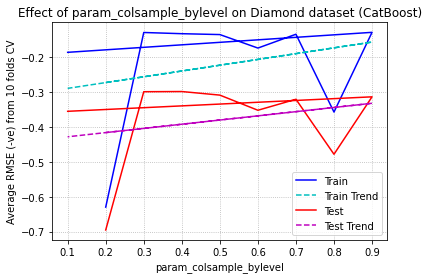

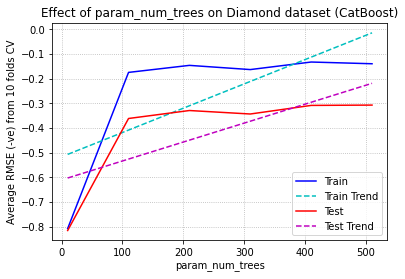

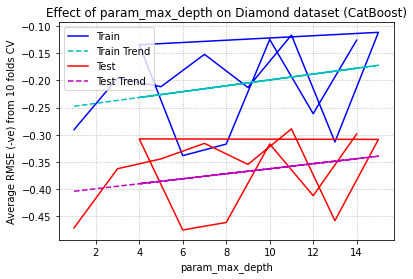

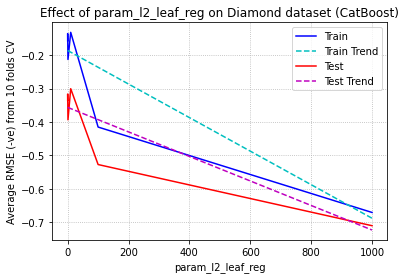

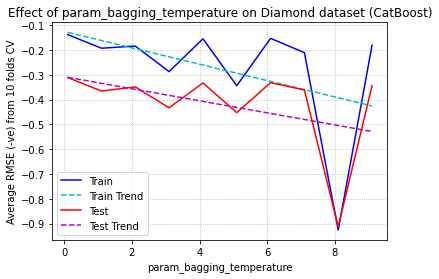

In [ ]:
param_list = ['param_colsample_bylevel','param_num_trees','param_max_depth','param_l2_leaf_reg',
              'param_bagging_temperature'] 
for param in param_list:
    param_set = sorted(list(set(opti_catboost.cv_results_[param])))
    param_set_2 = sorted(list(set(opti_catboost2.cv_results_[param])))
    param_trainscore = []
    param_trainscore_2 = []
    param_testscore = []
    param_testscore_2 = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_catboost.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_catboost.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
    for it in param_set_2:
        param_trainscore_2.append(np.mean([opti_catboost2.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost2.cv_results_[param]) 
                                              if x == it]])) 
        param_testscore_2.append(np.mean([opti_catboost2.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost2.cv_results_[param]) 
                                              if x == it]])) 
        
    comb_param_set, comb_trainscore = join_list(param_set,param_set_2,param_trainscore,param_trainscore_2)
    comb_param_set, comb_testscore = join_list(param_set,param_set_2,param_testscore,param_testscore_2)
    
    plt.plot(comb_param_set,comb_trainscore,label="Train",color='b')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_trainscore,1))(comb_param_set),'--',label="Train Trend",color='c')
    plt.plot(comb_param_set,comb_testscore,label="Test",color='r')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_testscore,1))(comb_param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Diamond dataset (CatBoost)" % param)
    plt.savefig('/content/drive/My Drive/figures/Q22catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

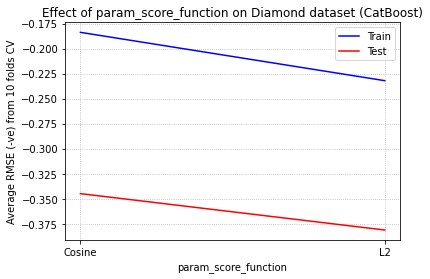

In [ ]:
param_list = ['param_score_function'] 
for param in param_list:
    param_set = sorted(list(set(opti_catboost.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_catboost.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_catboost.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Diamond dataset (CatBoost)" % param)
    plt.savefig('/content/drive/My Drive/figures/Q22catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

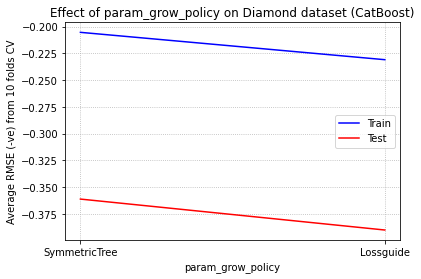

In [ ]:
param_list = ['param_grow_policy'] 
for param in param_list:
    param_set = sorted(list(set(opti_catboost.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opti_catboost.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opti_catboost.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opti_catboost.cv_results_[param]) 
                                              if x == item]])) 
    param_trainscore.append(np.mean(opti_catboost2.cv_results_['mean_train_score']))
    param_testscore.append(np.mean(opti_catboost2.cv_results_['mean_test_score']))
    param_set.append('Lossguide')
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on Diamond dataset (CatBoost)" % param)
    plt.savefig('/content/drive/My Drive/figures/Q22catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()